In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline
import warnings


# Reading Data

In [3]:
train = pd.read_csv('datasets/train_data.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test = pd.read_csv('datasets/test_data.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#make copy of the original data 

train_original=train.copy()
test_original=test.copy()

# Understanding the datasets

In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [8]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
train.shape

(614, 13)

In [10]:
test.shape

(367, 12)

In [11]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

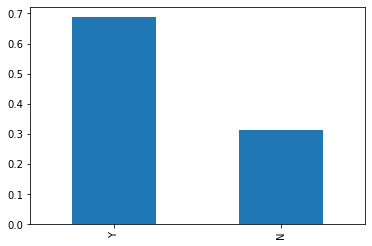

In [12]:
train['Loan_Status'].value_counts(normalize=True).plot.bar()

 
The loan of 422(around 69%) people out of 614 were approved.


---
## Independent Variable (Categorical)

These features have categories. 
1. Gender 
2. Married
3. Self_Employed
4. Credit_History

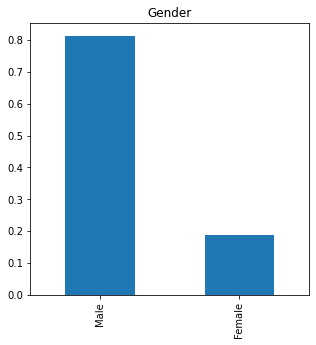

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

In [13]:
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(5,5), title='Gender')
plt.show()
train['Gender'].value_counts(normalize=True)


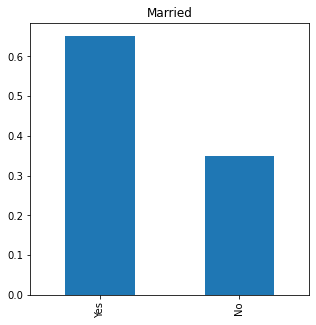

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

In [14]:
train['Married'].value_counts(normalize=True).plot.bar(figsize=(5,5), title='Married')
plt.show()
train['Married'].value_counts(normalize=True)

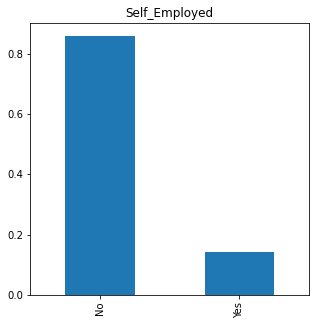

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

In [15]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(5,5), title='Self_Employed')
plt.show()
train['Self_Employed'].value_counts(normalize=True)

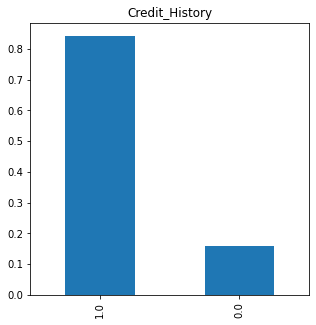

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

In [16]:
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(5,5), title='Credit_History')
plt.show()
train['Credit_History'].value_counts(normalize=True)


It can be inferred from the above bar plots that:
- 80% of applicants in the dataset are male.
- Around 65% of the applicants in the dataset are married.
- Around 15% of applicants in the dataset are self-employed.
- Around 85% of applicants have repaid their doubts.
---

## Independent Variable (Ordinal)

These features have categories. 
1. Dependents 
2. Education
3. Property_Area

In [ ]:
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(8,8), title='Dependents')
plt.show()
train['Dependents'].value_counts(normalize=True)

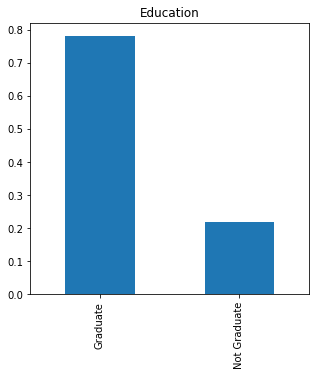

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

In [17]:
train['Education'].value_counts(normalize=True).plot.bar(figsize=(5,5), title='Education')
plt.show()
train['Education'].value_counts(normalize=True)

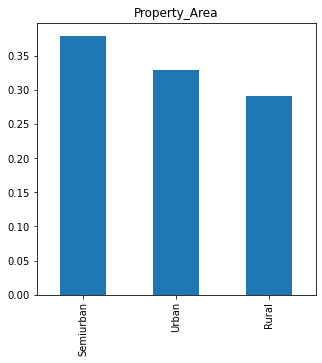

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64

In [18]:
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(5,5), title='Property_Area')
plt.show()
train['Property_Area'].value_counts(normalize=True)

The following inferences can be made from the above bar plots:
- Most of the applicants don't have any dependents.
- Around 80% of the applicants are Graduate.
- Most of the applicants are from the Semiurban area.
---

## Independent Variable (Numerical)



C:\Users\fabash\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


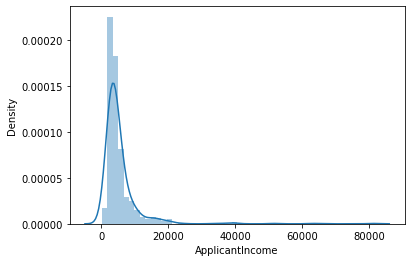

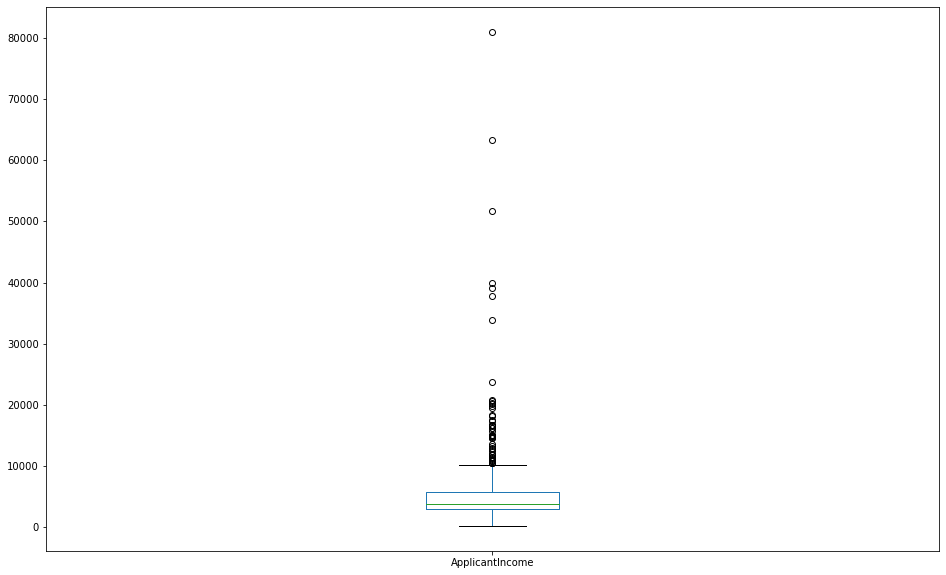

In [19]:
sns.distplot(train['ApplicantIncome'])
plt.show()
train['ApplicantIncome'].plot.box(figsize=(16,10))
plt.show()

- Most of the data in the distribution of applicant income are towards the left. 
- It is not normally distributed. 
- The boxplot confirms the presence of a lot of outliers/extreme values. 
- This can be attributed to the income disparity in the society. 
- Part of this can be driven by the fact that we are looking at people with different education levels. 

Text(0.5, 0.98, '')

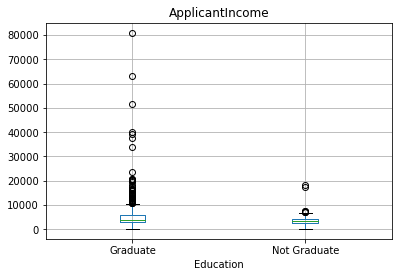

In [20]:
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be outliers.

C:\Users\fabash\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


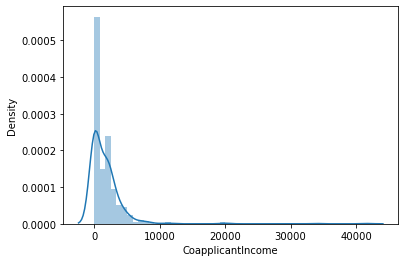

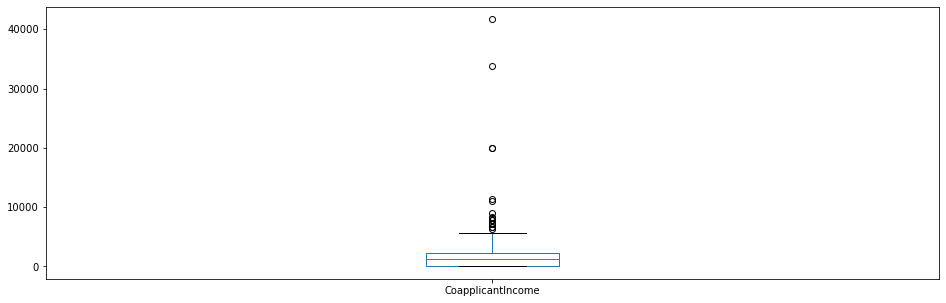

In [21]:
sns.distplot(train['CoapplicantIncome'])
plt.show()
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

- The majority of co-applicants income ranges from 0 to 5000. 
- We also see a lot of outliers in the applicant's income and it is not normally distributed.

C:\Users\fabash\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


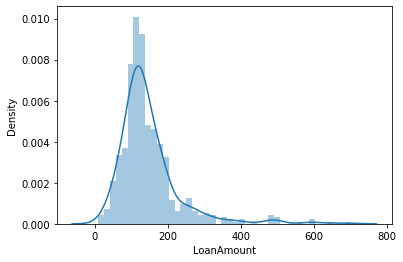

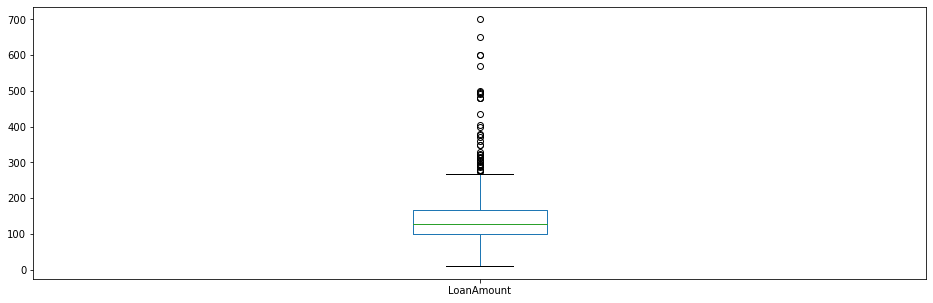

In [22]:
train.notna()
sns.distplot(train['LoanAmount'])
plt.show()
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal.

### Hypotheses of the data

- Applicants with high incomes should have more chances of loan approval.
- Applicants who have repaid their previous debts should have higher chances of loan approval.
- Loan approval should also depend on the loan amount. If the loan amount is less, the chances of loan approval should be high.
- Lesser the amount to be paid monthly to repay the loan, the higher the chances of loan approval.

---


# Categorical Independent Variable vs Target Variable

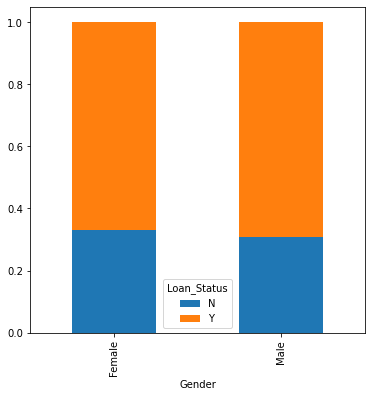

In [32]:
gender = pd.crosstab(train['Gender'],train['Loan_Status'])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,6))
plt.show()


The propotion of male and female applicants is more or less the same for both approved (Y) and unapproved loans (N).

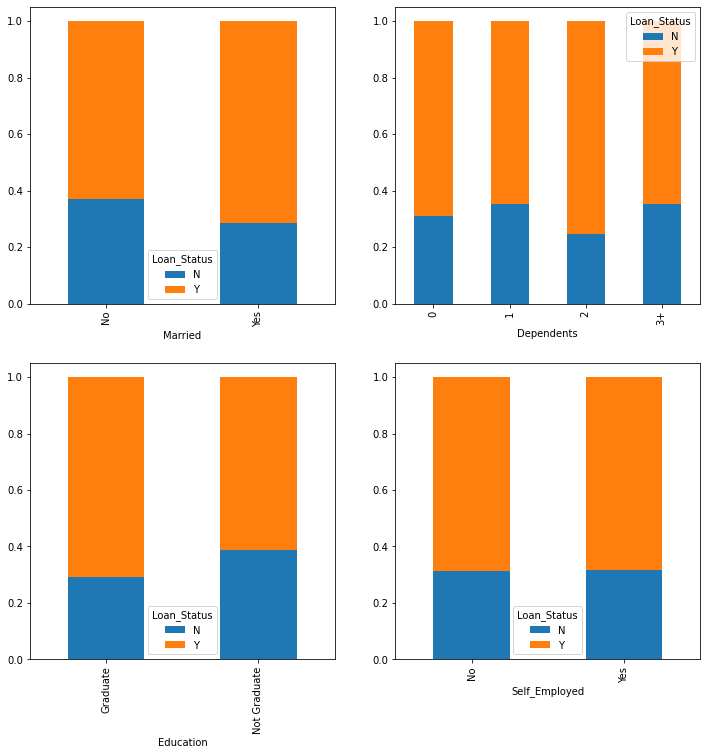

In [96]:
married = pd.crosstab(train['Married'],train['Loan_Status'])
dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
education = pd.crosstab(train['Education'],train['Loan_Status'])
selfemployed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])

fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (12,12))

married.div(married.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, ax=axes[0,0])
dependents.div(dependents.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, ax=axes[0,1])
education.div(education.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, ax=axes[1,0])
selfemployed.div(selfemployed.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, ax=axes[1,1])

plt.show()

- The proportion of married applicants is higher for approved loans.
- Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
- There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

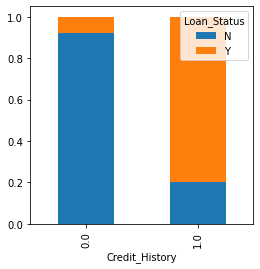

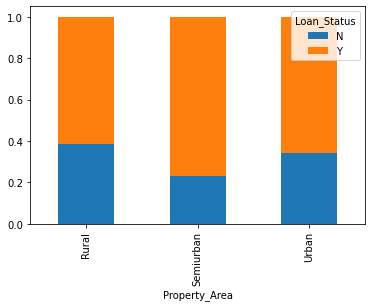

In [111]:
credhist=pd.crosstab(train['Credit_History'],train['Loan_Status'])
proparea=pd.crosstab(train['Property_Area'],train['Loan_Status'])


credhist.div(credhist.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
proparea.div(proparea.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.show()



- It seems people with a credit history as 1 are more likely to get their loans approved.

- The proportion of loans getting approved in the semi-urban area is higher as compared to that in rural or urban areas.

# Categorical Independent Variable vs Target Variable

In [1]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

NameError: name 'train' is not defined